### Laboratorio 6 - Sistema de Recomendación (Basado En Filtro Colaborativo)
Stefano Aragoni, Carol Arévalo

-----------

En esta práctica se diseñó una red neuronal para la predicción de ratings de películas, basado en el filtro colaborativo. Dicha red recibe el ID de un usuario y el ISBN de una película, y el grupo de usuario al que pertenece, y devuelve un rating estimado para dicha película.

A continuación se muestra el código utilizado para la creación de la Red Neuronal, así como los resultados obtenidos.

------- 

##### *Importar librerías*

Como primer paso, se importaron las librerías necesarias para el desarrollo del laboratorio.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, GaussianDropout
from keras import regularizers
from keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from keras.layers import Activation
from keras.callbacks import EarlyStopping

2023-11-01 14:19:19.259495: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### *Cargar datos*

Posteriormente, se cargaron los datos del archivo ./archive/final_ratings.csv. Este ya fue analizado y procesado en el análisis exploratorio de datos, por lo que no se realizaron modificaciones adicionales.

In [2]:
# Cargamos los datos
df = pd.read_csv('./archive/final_ratings.csv')

df.head()

,User-ID,Location,Age,ISBN,Book-Author,Year-Of-Publication,Publisher,Book-Rating,User-Group
0,248805,5290,34.0,425118703.0,21432,1995.0,1714,9,0
1,248805,5290,34.0,451179285.0,90803,1994.0,10280,10,0
2,248805,5290,34.0,553279378.0,62076,1983.0,1414,10,0
3,248805,5290,34.0,805059628.0,77933,1999.0,6903,9,0
4,248805,5290,34.0,671832174.0,98820,1979.0,11710,0,0


##### *Conjunto de Entrenamiento y Validación*

Se separó el conjunto de datos en un conjunto de entrenamiento y un conjunto de validación, con el fin de poder evaluar el desempeño de la red neuronal.

In [3]:
scaler = MinMaxScaler()
X = df[['User-Group', 'Book-Author', 'Year-Of-Publication', 'Publisher']].values
X = scaler.fit_transform(X)

scaler2 = MinMaxScaler()
y = df[['Book-Rating']].values
y = scaler2.fit_transform(y)

# Dividimos los datos en entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(217783, 4) (217783, 1) (93336, 4) (93336, 1)


##### *Diseño de Red Neuronal*

Posteriormente, se diseñó la red neuronal. Esta recibe como entrada el ID de un usuario, el ISBN de una película, y el grupo de usuario al que pertenece, y devuelve un rating estimado para dicha película.

Esta red permite un Sistema de Recomendación basado en Filtro Colaborativo, ya que permite predecir el rating que un usuario le daría a una película, basado en los ratings que otros usuarios le han dado a dicha película y sus similitudes con el usuario en cuestión.

In [4]:
model2 = Sequential()

model2.add(Dense(128, input_shape=(X_train.shape[1],)))
model2.add(Activation('relu'))

model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dense(32))
model2.add(Activation('relu'))

model2.add(Dense(16))
model2.add(Activation('relu'))

model2.add(Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='huber_loss', metrics=['mae'])

In [5]:
# Early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Enrtenamiento del modelo
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss1 = model2.evaluate(X_test, y_test)
print(f"\nTest loss (Model 1): {loss1}")

Epoch 1/10
1702/1702 [==============================] - 5s 2ms/step - loss: 0.0627 - mae: 0.2812 - val_loss: 0.0501 - val_mae: 0.2486
Epoch 2/10
1702/1702 [==============================] - 3s 2ms/step - loss: 0.0486 - mae: 0.2451 - val_loss: 0.0470 - val_mae: 0.2399
Epoch 3/10
1702/1702 [==============================] - 3s 2ms/step - loss: 0.0471 - mae: 0.2395 - val_loss: 0.0469 - val_mae: 0.2380
Epoch 4/10
1702/1702 [==============================] - 3s 2ms/step - loss: 0.0471 - mae: 0.2393 - val_loss: 0.0469 - val_mae: 0.2421
Epoch 5/10
1702/1702 [==============================] - 4s 2ms/step - loss: 0.0470 - mae: 0.2392 - val_loss: 0.0469 - val_mae: 0.2355
Epoch 6/10
1702/1702 [==============================] - 4s 2ms/step - loss: 0.0470 - mae: 0.2391 - val_loss: 0.0468 - val_mae: 0.2386
Epoch 7/10
1702/1702 [==============================] - 4s 2ms/step - loss: 0.0470 - mae: 0.2391 - val_loss: 0.0468 - val_mae: 0.2389
Epoch 8/10
1702/1702 [==============================] - 4s 2ms

En este caso, se tiene un Huber Loss de 0.0467 y un MAE de 0.2389.

Esto significa que, en promedio, las predicciones difieren en 0.2389 del valor real. Ya que los valores están escalados del 0 a 1, esto significa que las predicciones difieren en un 25.82% en promedio del valor real.

Este valor es relativamente bajo. En realidad, los grupos fueron creados utilizando:
- El año promedio de publicación de los libros leídos
- El promedio de calificaciones dadas

Por tal motivo, hay factores aún que posiblemente no se tomaron en cuenta. De tener el género del libro, posiblemnte se podrían crear grupos más específicos, y por lo tanto, mejores predicciones.

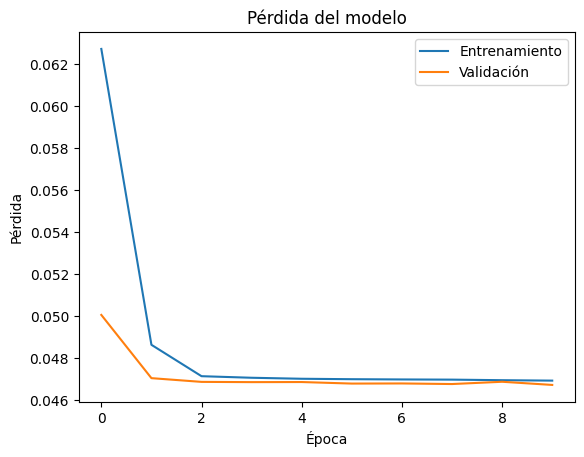

In [8]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')

plt.show()

--------
### *Pruebas*

A continuación se muestran algunas pruebas realizadas con la red neuronal.

In [ ]:
# Obtener info de libros
df_libros = pd.read_csv('./archive/final_books.csv')

In [47]:
def prueba():
    # Seleccionar un dato de prueba aleatorio
    random_index = np.random.randint(0, len(X_test))

    # Predecir el rating del libro
    y_pred = model2.predict(X_test[random_index].reshape(1, 4))
    y_pred = y_pred[0][0]

    # Obtener el rating real del libro
    y_real = y_test[random_index].reshape(-1, 1)
    y_real = y_real[0][0]

    print(f"Rating real: {y_real}")
    print(f"Rating predicho: {y_pred}")

    if y_pred > 0.5:
        print("\nCreemos que SÍ te gustará este libro, según gustos de personas con gustos similares a los tuyos")
    else:
        print("\nCreemos que NO te gustará este libro, según gustos de personas con gustos similares a los tuyos")


prueba()

1/1 [==============================] - 0s 25ms/step
Rating real: 0.7000000000000001
Rating predicho: 0.6826359629631042

Creemos que SÍ te gustará este libro, según gustos de personas con gustos similares a los tuyos


In [52]:
prueba()

1/1 [==============================] - 0s 25ms/step
Rating real: 0.30000000000000004
Rating predicho: 0.40416646003723145

Creemos que NO te gustará este libro, según gustos de personas con gustos similares a los tuyos
